In [122]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from sqlalchemy import Column, Integer, Float, Date, String, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Table
import csv

In [123]:
import numpy as np
import pandas as pd

In [124]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [125]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [126]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [127]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [128]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [129]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [130]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [131]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [132]:
columns = inspector.get_columns('station_table')
for c in columns:
    print(c['name'], c["type"])

In [133]:
Session = sessionmaker(bind=engine)
session = Session()

In [134]:
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-20', '2017-08-')).all()
tobs_results

[('USC00519397', 80.0),
 ('USC00519397', 76.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397',

# Exploratory Climate Analysis

In [135]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [136]:
# Calculate the date 1 year ago from the last data point in the database
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-20', '2017-08-20')).all()
last_12_months_of_precipitation_data=prcp_results
last_12_months_of_precipitation_data

[('2016-08-20', 0.0),
 ('2016-08-21', 0.12),
 ('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03

In [137]:
# Perform a query to retrieve the data and precipitation scores
date = [prcp_results[0] for prcp_result in prcp_results[0:]]
prcp= [prcp_results[1] for prcp_result in prcp_results[0:]]
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.set_index('date', inplace=True, )
prcp_df.head(5)

,prcp
date,
2016-08-20,0.00
2016-08-21,0.12
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08


In [138]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_list = prcp_df["prcp"].tolist()

In [91]:
# Sort the dataframe by date
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.head(5)

,date,prcp
0,2016-08-20,0.00
1,2016-08-21,0.12
2,2016-08-22,0.40
3,2016-08-23,0.00
4,2016-08-24,0.08


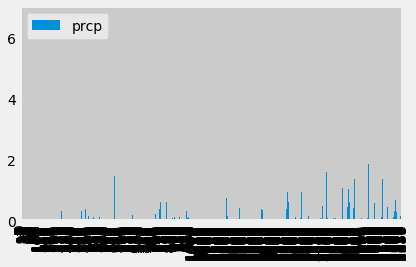

In [92]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar(grid=True)
plt.tight_layout()
plt.show()

In [93]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2027.000000
mean,0.179724
std,0.464142
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [94]:
# Design a query to show how many stations are available in this dataset?
total_number_of_stations = session.query(Measurement.station).distinct(Measurement.station).count()
print("Total number of stations is "+ str(total_number_of_stations))

Total number of stations is 9


In [95]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
print ( "Station which has the highest number of observations is  " + str(Most_active_stations))

Station which has the highest number of observations is  USC00519281


In [96]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Most_active_stations_tobs_results = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2016-08-01', '2017-08-01')).\
                                   filter(Measurement.station == Most_active_stations).all()
Most_active_stations_tobs_results

[('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 81.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 81.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281',

In [97]:
Most_active_stations_temp = [result[1] for result in Most_active_stations_tobs_results[0:]]

/Users/mary/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


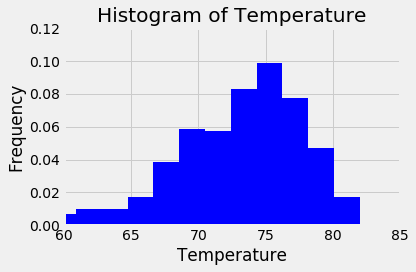

In [113]:
plt.hist(Most_active_stations_temp, bins = 12, align='mid', label="tobs", alpha=1, normed=3,color="b")
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.axis([60, 85, 0, 0.12])
plt.title('Histogram of Temperature')
plt.tight_layout()

plt.show()

In [99]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [100]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Temp=[]
start_date='2016-08-01'
end_date='2017-08-01'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
  
calc_temps(start_date, end_date)
Temp

[87.0, 58.0, 74.64288840262581]

In [101]:
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

/Users/mary/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


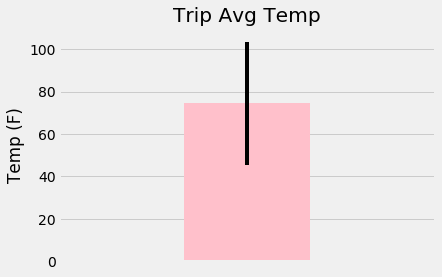

In [116]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar( 1,TAVG, color = 'pink', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.show()

In [103]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
engine.execute('SELECT * FROM station LIMIT 10').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]